# import libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# import data

In [4]:
df = pd.read_feather(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Data\Prepared Data\ridership.feather')

In [5]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,datetime_timestamp,date,time
0,01/01/2023 12:00:00 AM,subway,240,"7 Av (F,G)",Brooklyn,metrocard,Metrocard - Full Fare,46,1,40.666270,-73.98031,POINT (-73.98031 40.66627),2023-01-01,2023-01-01,00:00:00
1,01/01/2023 12:00:00 AM,subway,164,"34 St-Penn Station (A,C,E)",Manhattan,metrocard,Metrocard - Other,33,0,40.752290,-73.99339,POINT (-73.99339 40.75229),2023-01-01,2023-01-01,00:00:00
2,01/01/2023 12:00:00 AM,subway,453,82 St-Jackson Hts (7),Queens,omny,OMNY - Full Fare,22,0,40.747658,-73.88370,POINT (-73.8837 40.747658),2023-01-01,2023-01-01,00:00:00
3,01/01/2023 12:00:00 AM,subway,9,"57 St-7 Av (N,Q,R,W)",Manhattan,metrocard,Metrocard - Seniors & Disability,13,0,40.764664,-73.98066,POINT (-73.98066 40.764664),2023-01-01,2023-01-01,00:00:00
4,01/01/2023 12:00:00 AM,subway,357,"Beverly Rd (2,5)",Brooklyn,metrocard,Metrocard - Full Fare,1,0,40.645100,-73.94896,POINT (-73.94896 40.6451),2023-01-01,2023-01-01,00:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52611963 entries, 0 to 52611962
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   transit_timestamp    object        
 1   transit_mode         object        
 2   station_complex_id   object        
 3   station_complex      object        
 4   borough              object        
 5   payment_method       object        
 6   fare_class_category  object        
 7   ridership            int64         
 8   transfers            int64         
 9   latitude             float64       
 10  longitude            float64       
 11  Georeference         object        
 12  datetime_timestamp   datetime64[ns]
 13  date                 object        
 14  time                 object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 5.9+ GB


# create a month column for aggregation on a monthly level

In [8]:
df['month'] = df['datetime_timestamp'].dt.to_period('M')

In [49]:
df.month.dtype

period[M]

In [9]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,datetime_timestamp,date,time,month
0,01/01/2023 12:00:00 AM,subway,240,"7 Av (F,G)",Brooklyn,metrocard,Metrocard - Full Fare,46,1,40.666270,-73.98031,POINT (-73.98031 40.66627),2023-01-01,2023-01-01,00:00:00,2023-01
1,01/01/2023 12:00:00 AM,subway,164,"34 St-Penn Station (A,C,E)",Manhattan,metrocard,Metrocard - Other,33,0,40.752290,-73.99339,POINT (-73.99339 40.75229),2023-01-01,2023-01-01,00:00:00,2023-01
2,01/01/2023 12:00:00 AM,subway,453,82 St-Jackson Hts (7),Queens,omny,OMNY - Full Fare,22,0,40.747658,-73.88370,POINT (-73.8837 40.747658),2023-01-01,2023-01-01,00:00:00,2023-01
3,01/01/2023 12:00:00 AM,subway,9,"57 St-7 Av (N,Q,R,W)",Manhattan,metrocard,Metrocard - Seniors & Disability,13,0,40.764664,-73.98066,POINT (-73.98066 40.764664),2023-01-01,2023-01-01,00:00:00,2023-01
4,01/01/2023 12:00:00 AM,subway,357,"Beverly Rd (2,5)",Brooklyn,metrocard,Metrocard - Full Fare,1,0,40.645100,-73.94896,POINT (-73.94896 40.6451),2023-01-01,2023-01-01,00:00:00,2023-01


In [81]:
monthly_df = (
    df.groupby(['month', 'station_complex', 'fare_class_category', 'transit_mode','borough'])[['ridership', 'transfers']]
      .sum()
      .reset_index()
)


In [67]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102952 entries, 0 to 102951
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype    
---  ------               --------------   -----    
 0   month                102952 non-null  period[M]
 1   station_complex      102952 non-null  object   
 2   fare_class_category  102952 non-null  object   
 3   transit_mode         102952 non-null  object   
 4   ridership            102952 non-null  int64    
 5   transfers            102952 non-null  int64    
dtypes: int64(2), object(3), period[M](1)
memory usage: 4.7+ MB


In [73]:
monthly_df.month.dtype

period[M]

In [87]:
#realized I need it as a string to be able to merge with other data
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()  # Convert to datetime
monthly_df['month'] = monthly_df['month'].dt.strftime('%m-%Y')  # Format as 'MM-YYYY'

In [13]:
#removing row limit for easier viewing 
pd.set_option('display.max_rows', None)

# import labor force dataset

In [29]:
labor = pd.read_csv(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Data\Original Data\labor23-24.csv')

In [37]:
labor.head()

,Borough,Year,Month,MonthDT,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,Bronx,2023,1,Jan-23,"607,200","561,500","45,700",7.5
1,Bronx,2023,2,Feb-23,"612,800","566,900","45,900",7.5
2,Bronx,2023,3,Mar-23,"612,500","570,300","42,200",6.9
3,Bronx,2023,4,Apr-23,"605,600","567,100","38,400",6.3
4,Bronx,2023,5,May-23,"607,400","567,900","39,500",6.5


# formatting Month column for merging

In [35]:
labor['MonthDT'] = pd.to_datetime(labor['MonthDT'], format='%b-%y')

In [37]:
labor['MonthDT'] = labor['MonthDT'].dt.strftime('%m-%Y')

In [89]:
labor.dtypes

Borough                   object
Year                       int64
Month                      int64
MonthDT                   object
Labor Force               object
Employed                  object
Unemployed                object
Unemployment Rate (%)    float64
dtype: object

In [109]:
#converting to string
labor['Labor Force'] = labor['Labor Force'].astype('int64')

ValueError: invalid literal for int() with base 10: '607,200'

In [53]:
#making sure it work 
labor['MonthDT'].apply(type).value_counts()

MonthDT
<class 'str'>    120
Name: count, dtype: int64

In [91]:
#merging df's
merged_df = pd.merge(monthly_df, labor, left_on=['month','borough'], right_on=['MonthDT','Borough'], how='inner')

In [93]:
merged_df.head()

,month,station_complex,fare_class_category,transit_mode,borough,ridership,transfers,Borough,Year,Month,MonthDT,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,01-2023,1 Av (L),Metrocard - Fair Fare,subway,Manhattan,8617,366,Manhattan,2023,1,01-2023,"927,200","884,800","42,400",4.6
1,01-2023,1 Av (L),Metrocard - Full Fare,subway,Manhattan,63904,2165,Manhattan,2023,1,01-2023,"927,200","884,800","42,400",4.6
2,01-2023,1 Av (L),Metrocard - Other,subway,Manhattan,14968,214,Manhattan,2023,1,01-2023,"927,200","884,800","42,400",4.6
3,01-2023,1 Av (L),Metrocard - Seniors & Disability,subway,Manhattan,10916,839,Manhattan,2023,1,01-2023,"927,200","884,800","42,400",4.6
4,01-2023,1 Av (L),Metrocard - Students,subway,Manhattan,24551,384,Manhattan,2023,1,01-2023,"927,200","884,800","42,400",4.6


In [103]:
merged_df.dtypes

month                     object
station_complex           object
fare_class_category       object
transit_mode              object
borough                   object
ridership                  int64
transfers                  int64
Borough                   object
Year                       int64
Month                      int64
MonthDT                   object
Labor Force               object
Employed                  object
Unemployed                object
Unemployment Rate (%)    float64
dtype: object

In [105]:
merged_df['Labor Force'] = merged_df['Labor Force'].astype('int64')

ValueError: invalid literal for int() with base 10: '927,200'

In [113]:
merged_df.shape

(102952, 15)

In [115]:
merged_df.to_feather(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Data\Prepared Data\riderlabormerged.feather')

In [12]:
df = pd.read_feather(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Data\Prepared Data\riderlabormerged.feather')

In [11]:
df.head()

,month,station_complex,fare_class_category,transit_mode,borough,ridership,transfers,Borough,Year,Month,MonthDT,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,01-2023,1 Av (L),Metrocard - Fair Fare,subway,Manhattan,8617,366,Manhattan,2023,1,01-2023,927200,884800,42400,4.6
1,01-2023,1 Av (L),Metrocard - Full Fare,subway,Manhattan,63904,2165,Manhattan,2023,1,01-2023,927200,884800,42400,4.6
2,01-2023,1 Av (L),Metrocard - Other,subway,Manhattan,14968,214,Manhattan,2023,1,01-2023,927200,884800,42400,4.6
3,01-2023,1 Av (L),Metrocard - Seniors & Disability,subway,Manhattan,10916,839,Manhattan,2023,1,01-2023,927200,884800,42400,4.6
4,01-2023,1 Av (L),Metrocard - Students,subway,Manhattan,24551,384,Manhattan,2023,1,01-2023,927200,884800,42400,4.6


In [14]:
# List of columns to clean
cols_to_clean = ['Labor Force', 'Employed', 'Unemployed']

# Remove commas and convert to int64
for col in cols_to_clean:
    df[col] = df[col].replace({',': ''}, regex=True).astype('int64')

In [15]:
df_numeric = df.select_dtypes(include=['number'])

In [19]:
# checking correlation matrix
df_numeric.corr()

,ridership,transfers,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate (%)
ridership,1.000000,0.382915,0.003384,0.008215,-0.032428,-0.028853,-0.091372,-0.112580
transfers,0.382915,1.000000,-0.002270,0.001482,0.007357,0.009236,-0.027543,-0.056120
Year,0.003384,-0.002270,1.000000,0.005159,0.083687,0.081584,0.107506,0.045832
Month,0.008215,0.001482,0.005159,1.000000,0.008221,0.003288,0.094969,0.117234
Labor Force,-0.032428,0.007357,0.083687,0.008221,1.000000,0.999562,0.847147,-0.422769
Employed,-0.028853,0.009236,0.081584,0.003288,0.999562,1.000000,0.831054,-0.448561
Unemployed,-0.091372,-0.027543,0.107506,0.094969,0.847147,0.831054,1.000000,0.108309
Unemployment Rate (%),-0.112580,-0.056120,0.045832,0.117234,-0.422769,-0.448561,0.108309,1.000000


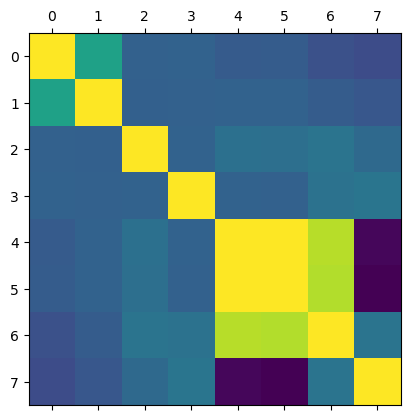

In [25]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_numeric.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 800x800 with 0 Axes>

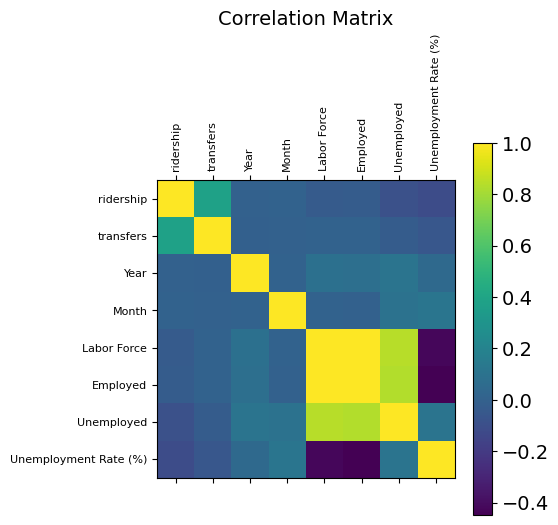

In [39]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_numeric.corr()) # type of plot
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=8, rotation=90) # x axis labels
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [47]:
df_numeric.columns

Index(['ridership', 'transfers', 'Year', 'Month', 'Labor Force', 'Employed',
       'Unemployed', 'Unemployment Rate (%)'],
      dtype='object')

In [53]:
sub = df_numeric[['ridership', 'transfers','Labor Force', 'Employed',
       'Unemployed']]

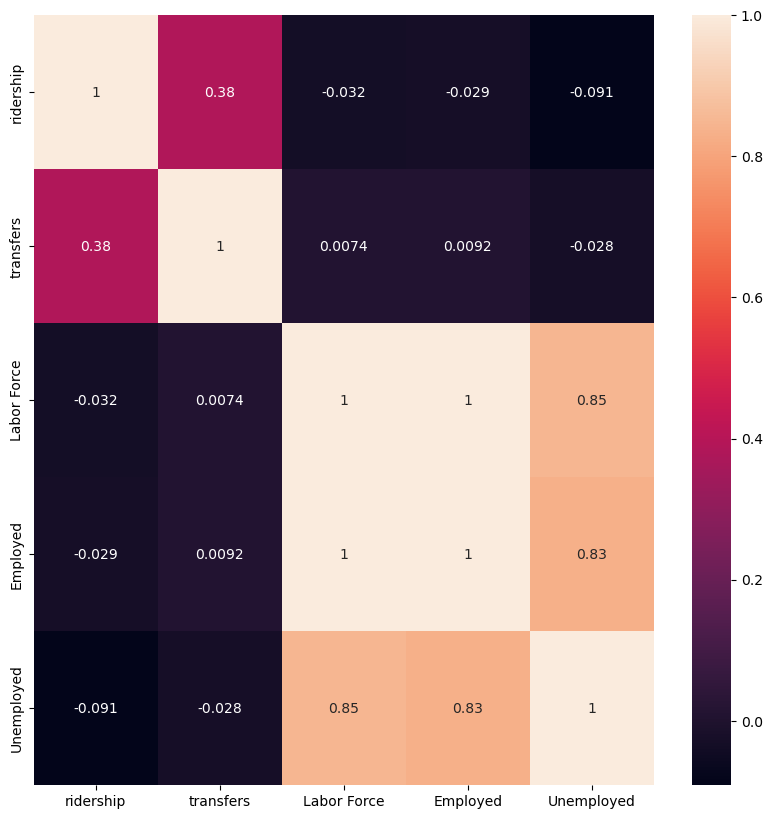

In [55]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There are no actionable findings here there only correlations found are between the variables that are already related
Next steps are to separate all of the fare classes into their own column so they can be included in the correlation matrix

### Using pivot table to turn fare_class_category count into its own columns aggregated for borough and month to match labor force metrics

In [16]:
pivot_df = df.pivot_table(
    index=['month', 'borough'],
    columns='fare_class_category',
    values=['ridership', 'transfers'],
    aggfunc='sum'
).reset_index()

In [18]:
#Adjusting column names in pivot tables for clarity
pivot_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in pivot_df.columns]

In [21]:
pivot_df.head()

,month_,borough_,ridership_Metrocard - Fair Fare,ridership_Metrocard - Full Fare,ridership_Metrocard - Other,ridership_Metrocard - Seniors & Disability,ridership_Metrocard - Students,ridership_Metrocard - Unlimited 30-Day,ridership_Metrocard - Unlimited 7-Day,ridership_OMNY - Fair Fare,...,transfers_Metrocard - Other,transfers_Metrocard - Seniors & Disability,transfers_Metrocard - Students,transfers_Metrocard - Unlimited 30-Day,transfers_Metrocard - Unlimited 7-Day,transfers_OMNY - Fair Fare,transfers_OMNY - Full Fare,transfers_OMNY - Other,transfers_OMNY - Seniors & Disability,transfers_OMNY - Students
0,01-2023,Bronx,455982.0,1634320.0,382086.0,213477.0,610250.0,675583.0,1018097.0,NaN,...,14362.0,44553.0,33186.0,0.0,1.0,NaN,118560.0,0.0,361.0,NaN
1,01-2023,Brooklyn,784565.0,4272444.0,989800.0,734367.0,1487269.0,2250614.0,1899368.0,NaN,...,20750.0,100749.0,94613.0,0.0,1.0,NaN,321867.0,0.0,987.0,NaN
2,01-2023,Manhattan,1216680.0,10435128.0,2095062.0,1665313.0,1619156.0,4734871.0,4360672.0,NaN,...,30622.0,113438.0,55611.0,0.0,0.0,NaN,423436.0,1.0,3616.0,NaN
3,01-2023,Queens,406791.0,3376406.0,586979.0,535050.0,892048.0,1653688.0,1770402.0,NaN,...,29979.0,120909.0,128783.0,0.0,0.0,NaN,483691.0,0.0,1119.0,NaN
4,01-2023,Staten Island,4919.0,68905.0,12811.0,8828.0,11095.0,11878.0,8685.0,NaN,...,1456.0,3384.0,2329.0,0.0,0.0,NaN,11892.0,0.0,39.0,NaN


In [23]:
#checking for null values 
pivot_df.isnull().sum()

month_                                         0
borough_                                       0
ridership_Metrocard - Fair Fare                0
ridership_Metrocard - Full Fare                0
ridership_Metrocard - Other                    0
ridership_Metrocard - Seniors & Disability     0
ridership_Metrocard - Students                 5
ridership_Metrocard - Unlimited 30-Day         0
ridership_Metrocard - Unlimited 7-Day          0
ridership_OMNY - Fair Fare                    93
ridership_OMNY - Full Fare                     0
ridership_OMNY - Other                         0
ridership_OMNY - Seniors & Disability          0
ridership_OMNY - Students                     97
transfers_Metrocard - Fair Fare                0
transfers_Metrocard - Full Fare                0
transfers_Metrocard - Other                    0
transfers_Metrocard - Seniors & Disability     0
transfers_Metrocard - Students                 5
transfers_Metrocard - Unlimited 30-Day         0
transfers_Metrocard 

In [25]:
#replacing nulls with 0's
pivot_df = pivot_df.fillna(0)

In [39]:
#merging new pivot table with fare class columns to labor data for correlation matrix 
merged_df = pd.merge(pivot_df, labor, left_on=['month_','borough_'], right_on=['MonthDT','Borough'], how='inner')

In [45]:
merged_df.head()

,month_,borough_,ridership_Metrocard - Fair Fare,ridership_Metrocard - Full Fare,ridership_Metrocard - Other,ridership_Metrocard - Seniors & Disability,ridership_Metrocard - Students,ridership_Metrocard - Unlimited 30-Day,ridership_Metrocard - Unlimited 7-Day,ridership_OMNY - Fair Fare,...,transfers_OMNY - Seniors & Disability,transfers_OMNY - Students,Borough,Year,Month,MonthDT,Labor Force,Employed,Unemployed,Unemployment Rate (%)
0,01-2023,Bronx,455982.0,1634320.0,382086.0,213477.0,610250.0,675583.0,1018097.0,0.0,...,361.0,0.0,Bronx,2023,1,01-2023,"607,200","561,500","45,700",7.5
1,01-2023,Brooklyn,784565.0,4272444.0,989800.0,734367.0,1487269.0,2250614.0,1899368.0,0.0,...,987.0,0.0,Brooklyn,2023,1,01-2023,"1,217,200","1,148,000","69,300",5.7
2,01-2023,Manhattan,1216680.0,10435128.0,2095062.0,1665313.0,1619156.0,4734871.0,4360672.0,0.0,...,3616.0,0.0,Manhattan,2023,1,01-2023,"927,200","884,800","42,400",4.6
3,01-2023,Queens,406791.0,3376406.0,586979.0,535050.0,892048.0,1653688.0,1770402.0,0.0,...,1119.0,0.0,Queens,2023,1,01-2023,"1,147,100","1,091,000","56,100",4.9
4,01-2023,Staten Island,4919.0,68905.0,12811.0,8828.0,11095.0,11878.0,8685.0,0.0,...,39.0,0.0,Staten Island,2023,1,01-2023,"228,500","216,400","12,100",5.3


In [47]:
# List of columns to reformat 
cols_to_clean = ['Labor Force', 'Employed', 'Unemployed']

# Remove commas and convert to int64
for col in cols_to_clean:
    merged_df[col] = merged_df[col].replace({',': ''}, regex=True).astype('int64')

In [49]:
#selecting only the columns with numbers to create corr matrix
df_corr = merged_df.select_dtypes(include=['number'])

In [51]:
df_corr.corr()

,ridership_Metrocard - Fair Fare,ridership_Metrocard - Full Fare,ridership_Metrocard - Other,ridership_Metrocard - Seniors & Disability,ridership_Metrocard - Students,ridership_Metrocard - Unlimited 30-Day,ridership_Metrocard - Unlimited 7-Day,ridership_OMNY - Fair Fare,ridership_OMNY - Full Fare,ridership_OMNY - Other,...,transfers_OMNY - Full Fare,transfers_OMNY - Other,transfers_OMNY - Seniors & Disability,transfers_OMNY - Students,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate (%)
ridership_Metrocard - Fair Fare,1.000000,0.883680,0.957507,0.957626,0.553490,0.933983,0.911128,0.334549,0.934822,0.441099,...,0.745876,0.135690,0.843046,0.177936,7.872844e-02,6.160201e-02,0.632548,0.633138,0.580508,-0.121133
ridership_Metrocard - Full Fare,0.883680,1.000000,0.971416,0.954558,0.625706,0.984523,0.982866,0.068261,0.892063,0.163664,...,0.716044,-0.068546,0.741914,-0.041323,-1.746314e-01,-7.241586e-02,0.481585,0.486814,0.353535,-0.316392
ridership_Metrocard - Other,0.957507,0.971416,1.000000,0.985062,0.648940,0.990596,0.973618,0.159888,0.942902,0.256033,...,0.743546,-0.014128,0.824984,0.019608,-4.628778e-02,-2.847980e-02,0.542499,0.546439,0.434283,-0.271149
ridership_Metrocard - Seniors & Disability,0.957626,0.954558,0.985062,1.000000,0.563840,0.984590,0.973216,0.230170,0.974790,0.373868,...,0.794385,0.060197,0.886193,0.104158,1.143957e-02,2.619584e-02,0.545122,0.550090,0.417661,-0.331931
ridership_Metrocard - Students,0.553490,0.625706,0.648940,0.563840,1.000000,0.641544,0.577844,-0.300448,0.441654,-0.320360,...,0.453518,-0.345406,0.346074,-0.349959,-2.341560e-01,-3.408148e-01,0.502899,0.507037,0.393478,-0.234969
ridership_Metrocard - Unlimited 30-Day,0.933983,0.984523,0.990596,0.984590,0.641544,1.000000,0.979827,0.144438,0.928823,0.249452,...,0.777818,-0.001638,0.807069,0.031302,-8.818245e-02,-4.426130e-02,0.567612,0.572751,0.435587,-0.337940
ridership_Metrocard - Unlimited 7-Day,0.911128,0.982866,0.973618,0.973216,0.577844,0.979827,1.000000,0.114676,0.929009,0.257003,...,0.778353,-0.013970,0.825241,0.019143,-1.097315e-01,1.115733e-03,0.500310,0.505520,0.371311,-0.304842
ridership_OMNY - Fair Fare,0.334549,0.068261,0.159888,0.230170,-0.300448,0.144438,0.114676,1.000000,0.281949,0.611309,...,0.217596,0.438987,0.281096,0.478512,3.500878e-01,2.835974e-01,0.314996,0.309865,0.389717,0.081916
ridership_OMNY - Full Fare,0.934822,0.892063,0.942902,0.974790,0.441654,0.928823,0.929009,0.281949,1.000000,0.482928,...,0.718889,0.075827,0.927733,0.132447,9.925801e-02,7.527650e-02,0.413872,0.418464,0.301838,-0.304155
ridership_OMNY - Other,0.441099,0.163664,0.256033,0.373868,-0.320360,0.249452,0.257003,0.611309,0.482928,1.000000,...,0.333432,0.662739,0.530683,0.729508,4.015554e-01,4.030441e-01,0.206540,0.205408,0.213841,0.006975


In [57]:
df_corr.columns

Index(['ridership_Metrocard - Fair Fare', 'ridership_Metrocard - Full Fare',
       'ridership_Metrocard - Other',
       'ridership_Metrocard - Seniors & Disability',
       'ridership_Metrocard - Students',
       'ridership_Metrocard - Unlimited 30-Day',
       'ridership_Metrocard - Unlimited 7-Day', 'ridership_OMNY - Fair Fare',
       'ridership_OMNY - Full Fare', 'ridership_OMNY - Other',
       'ridership_OMNY - Seniors & Disability', 'ridership_OMNY - Students',
       'transfers_Metrocard - Fair Fare', 'transfers_Metrocard - Full Fare',
       'transfers_Metrocard - Other',
       'transfers_Metrocard - Seniors & Disability',
       'transfers_Metrocard - Students',
       'transfers_Metrocard - Unlimited 30-Day',
       'transfers_Metrocard - Unlimited 7-Day', 'transfers_OMNY - Fair Fare',
       'transfers_OMNY - Full Fare', 'transfers_OMNY - Other',
       'transfers_OMNY - Seniors & Disability', 'transfers_OMNY - Students',
       'Year', 'Month', 'Labor Force', 'Employed

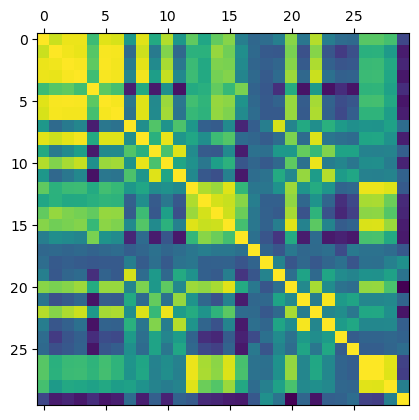

In [101]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_corr.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 1800x1800 with 0 Axes>

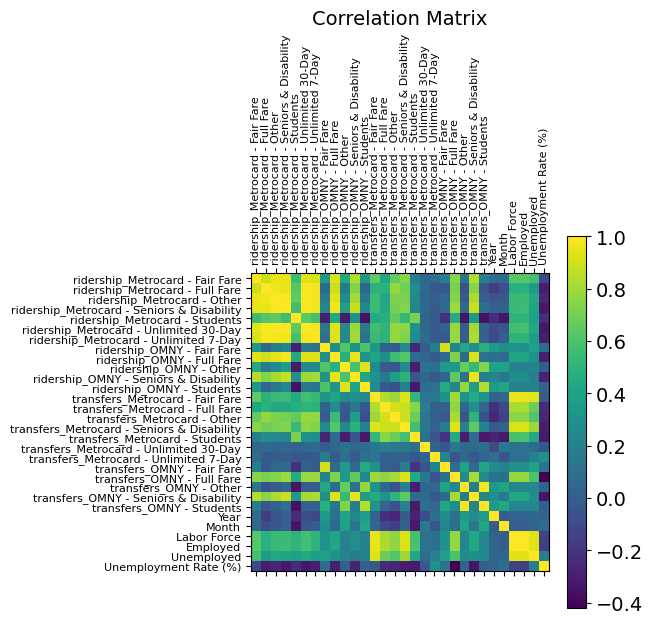

In [53]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(18, 18)) # figure size 
plt.matshow(df_corr.corr()) # type of plot
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8, rotation=90) # x axis labels
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Alot more promising but very difficult to read maybe we can limit the variables to make something that is easier to read. 

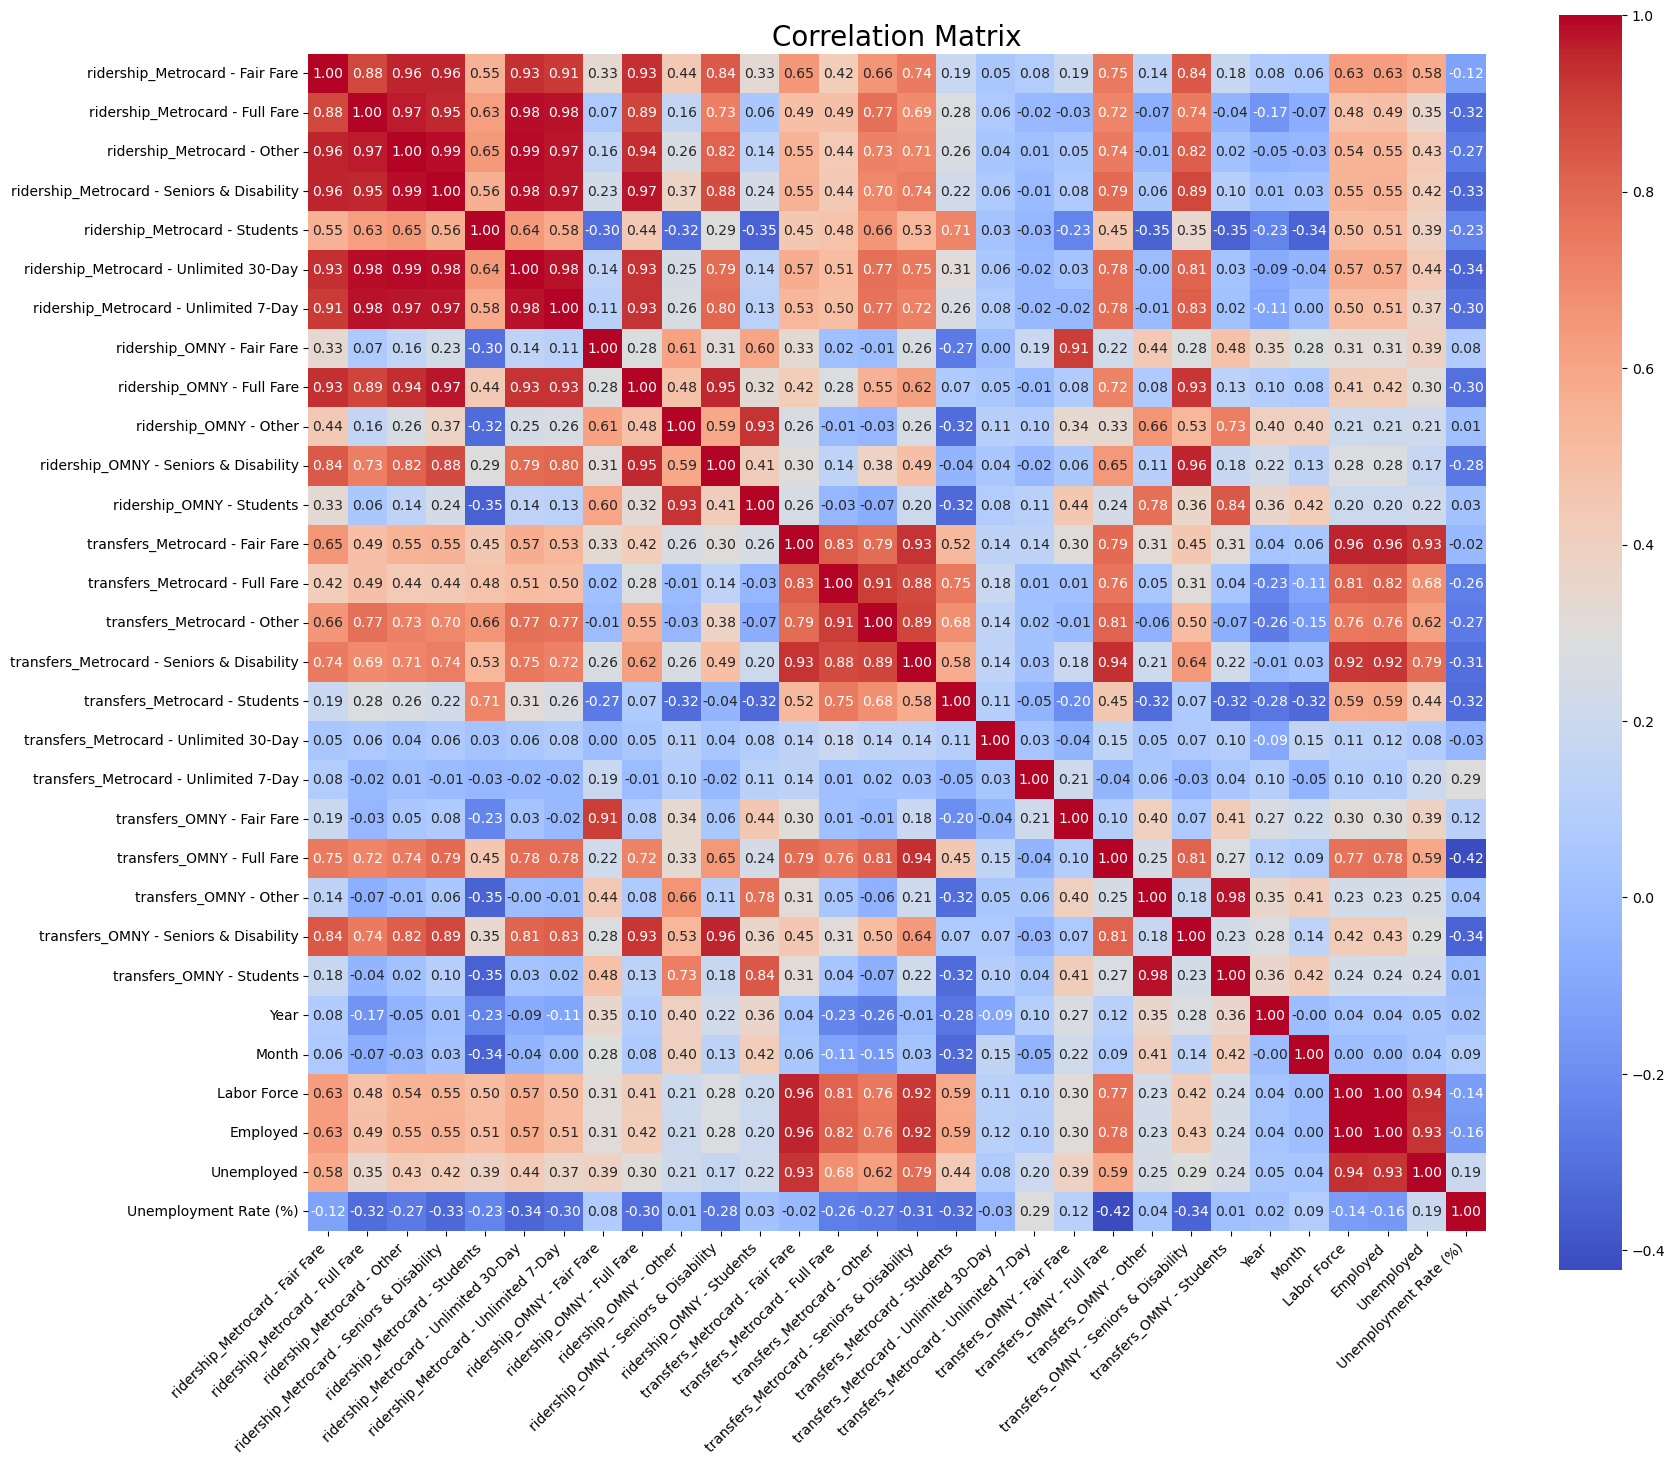

In [55]:
plt.figure(figsize=(18, 15))

# Create the heatmap with annotations
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Matrix", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts layout to prevent clipping
plt.show()


In [61]:
#going to create heatmap for only ridership fare classes and labor metrics
#first selecting my columns
rider_corr = ['ridership_Metrocard - Fair Fare', 'ridership_Metrocard - Full Fare',
       'ridership_Metrocard - Other',
       'ridership_Metrocard - Seniors & Disability',
       'ridership_Metrocard - Students',
       'ridership_Metrocard - Unlimited 30-Day',
       'ridership_Metrocard - Unlimited 7-Day', 'ridership_OMNY - Fair Fare',
       'ridership_OMNY - Full Fare', 'ridership_OMNY - Other',
       'ridership_OMNY - Seniors & Disability', 'ridership_OMNY - Students','Labor Force', 'Employed', 'Unemployed']

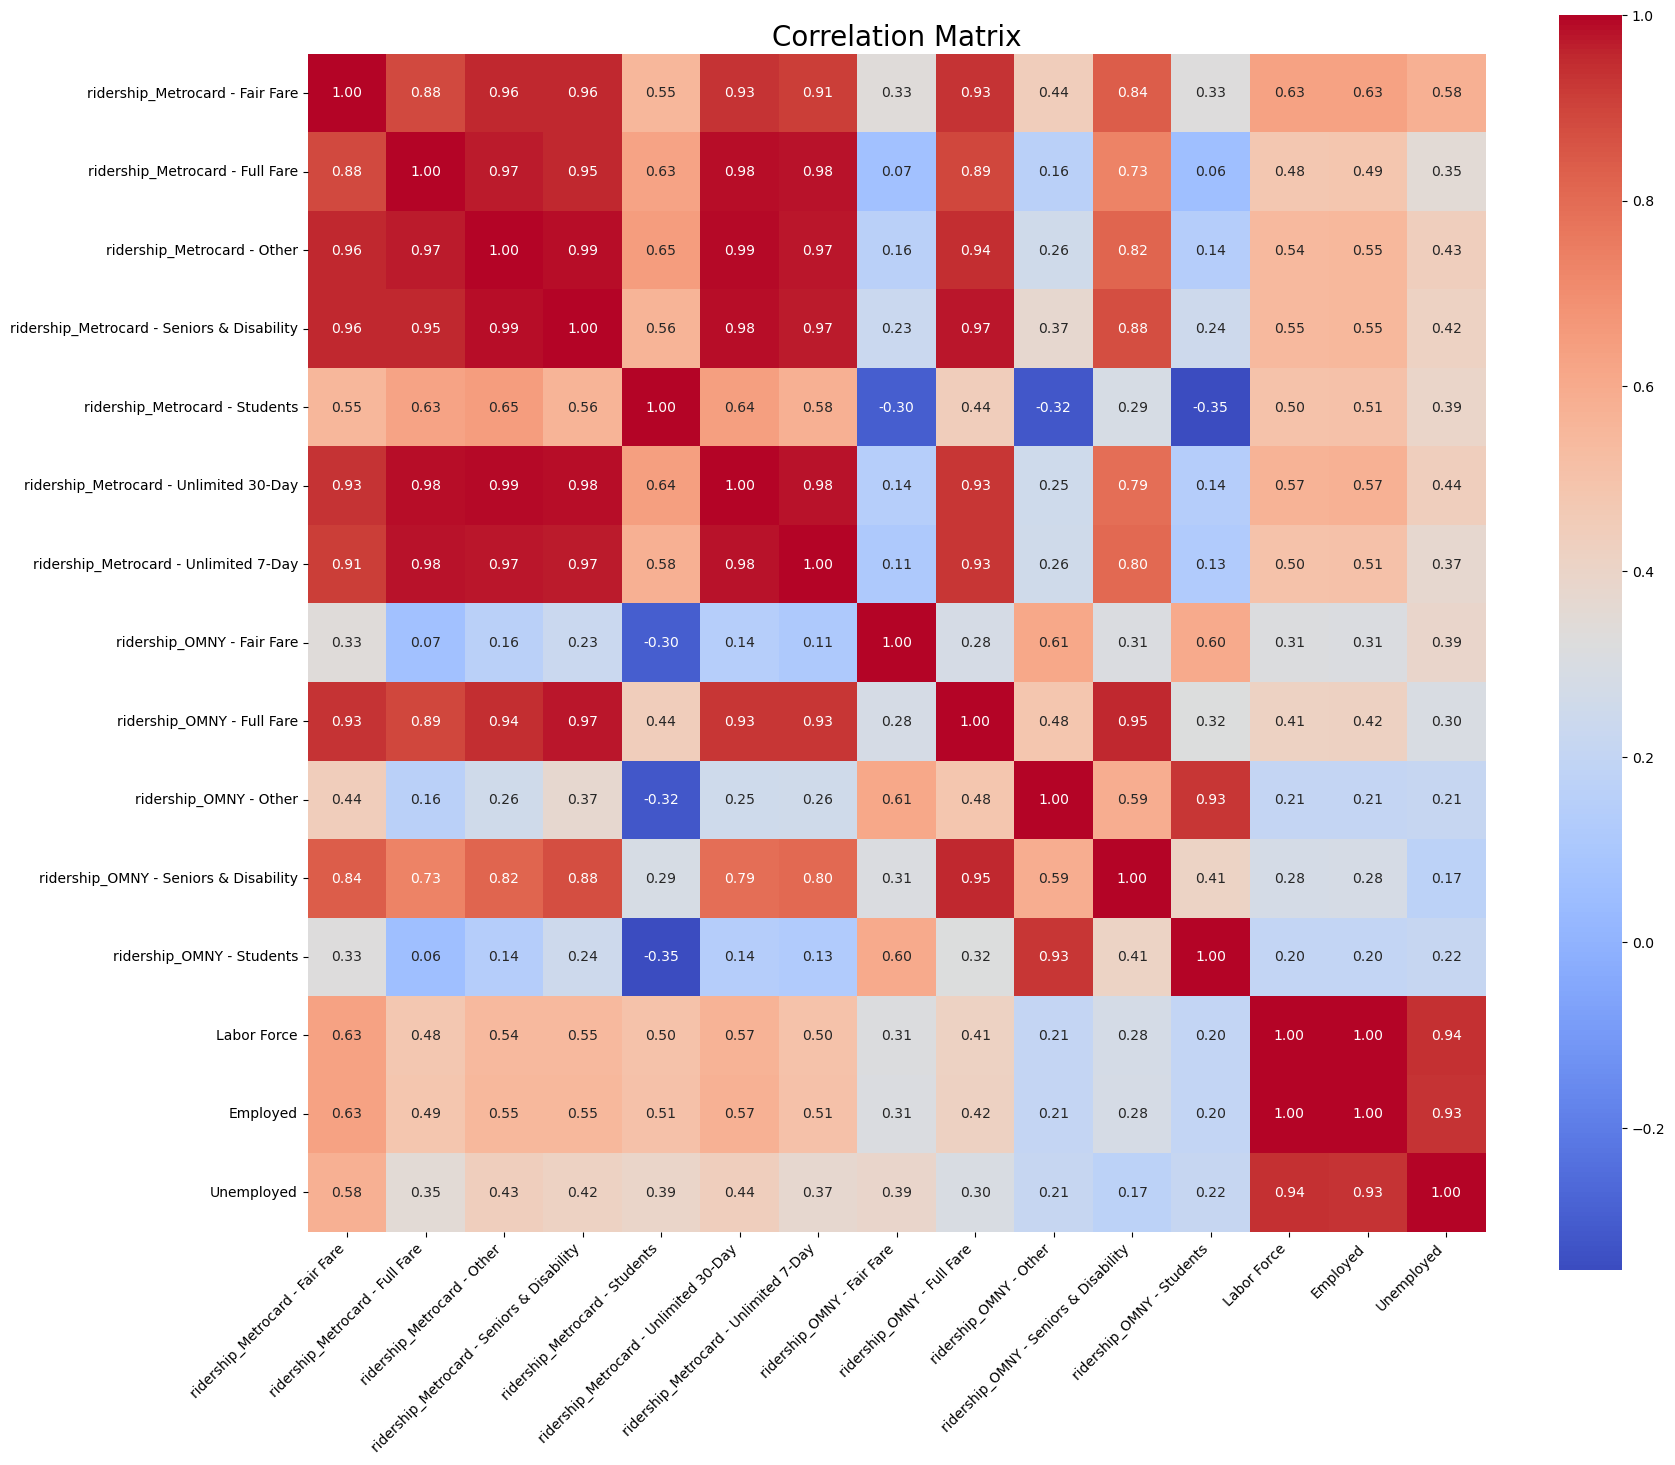

In [82]:
# Create the heatmap with annotations
plt.figure(figsize=(18, 15))
sns.heatmap(df_corr[rider_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts layout to prevent clipping
plt.savefig(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Visualizations\rider_matrix.png', dpi=300)  # High resolution (300 DPI)
plt.show()


In [72]:
transfer_corr = ['transfers_Metrocard - Fair Fare', 'transfers_Metrocard - Full Fare',
       'transfers_Metrocard - Other',
       'transfers_Metrocard - Seniors & Disability',
       'transfers_Metrocard - Students',
       'transfers_Metrocard - Unlimited 30-Day',
       'transfers_Metrocard - Unlimited 7-Day', 'transfers_OMNY - Fair Fare',
       'transfers_OMNY - Full Fare', 'transfers_OMNY - Other',
       'transfers_OMNY - Seniors & Disability', 'transfers_OMNY - Students',
        'Labor Force', 'Employed', 'Unemployed']

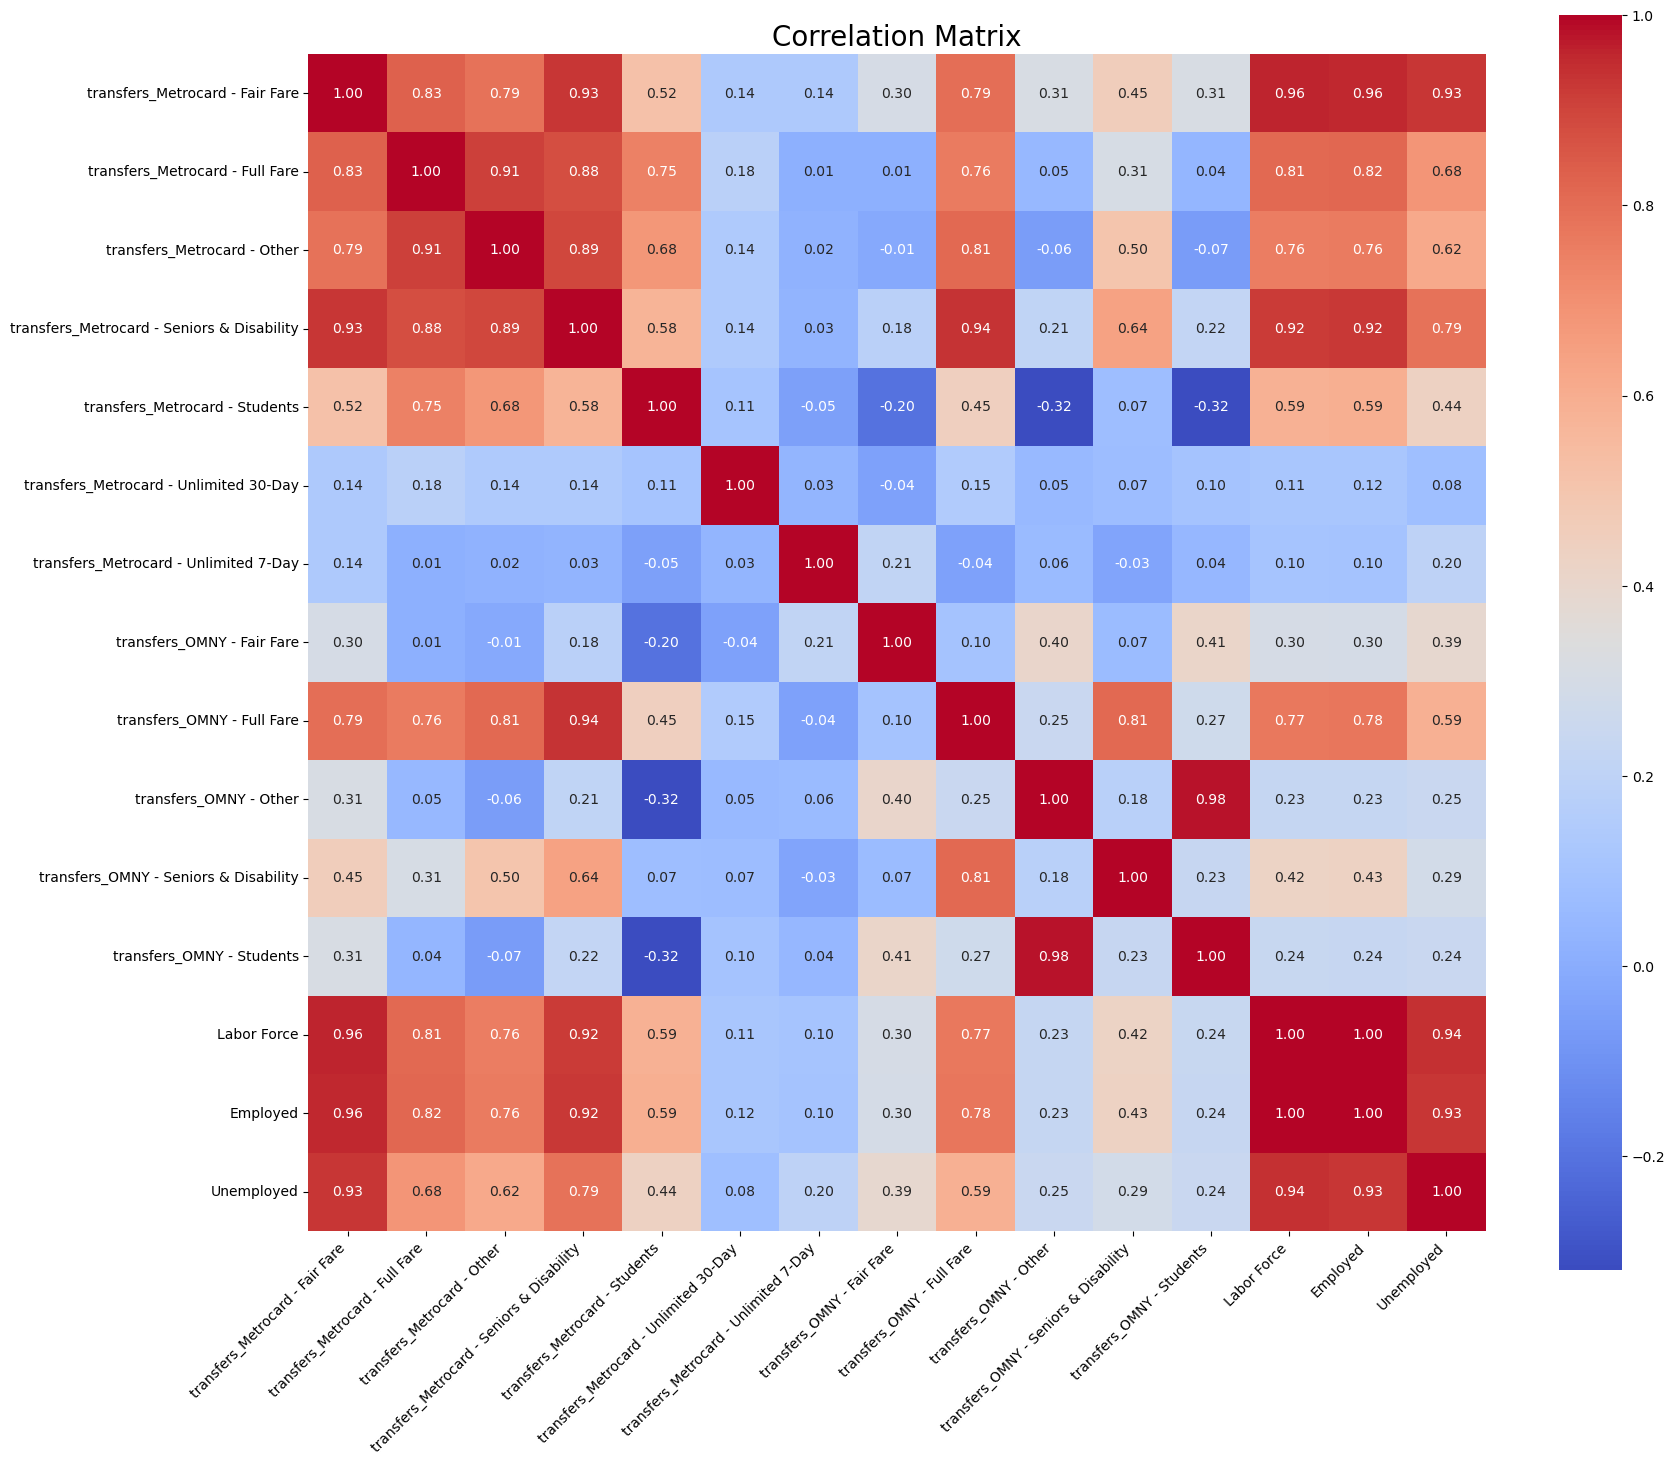

In [84]:
# Create the heatmap with annotations for transfer numbers with labor metrics
plt.figure(figsize=(18, 15))
sns.heatmap(df_corr[transfer_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts layout to prevent clipping
plt.savefig(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Visualizations\transfer_matrix.png', dpi=300)  # High resolution (300 DPI)
plt.show()


In [86]:
df_corr.to_feather(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Data\Prepared Data\corr_matrix_table.feather')